# Machine Learning solution - PHP

ML model to predict 'Thermal Resistance' and 'Temperature Drop' in PHP

## Data Loading and Pre-Processing

In [1]:
# loading ML module
from ml_solution_module import MachineLearning

from sklearn.feature_selection import mutual_info_regression
import pandas as pd

In [2]:
# assigning variable
ml = MachineLearning("data/")

data/ml_result already exists and ML reuslts will be stored here.


In [3]:
# loadig data from gfe_combined.csv from each sample and sving them as csv in data/ml_result/

df_w_40 = ml.data_prep('data/di_water_exp/40_FR/gfe_combined.csv', sample='DI_Water', fr=40)
df_w_60 = ml.data_prep('data/di_water_exp/60_FR/gfe_combined.csv', sample='DI_Water', fr=60)
df_a_40 = ml.data_prep('data/al2o3_diwater_exp/40_FR/gfe_combined.csv', sample='Al2O3_DI_Water', fr=40)
df_a_60 = ml.data_prep('data/al2o3_diwater_exp/60_FR/gfe_combined.csv', sample='Al2O3_DI_Water', fr=60)


Compiled data stored at data/ml_result/all_combined_data_DI_Water_40.csv
Compiled data stored at data/ml_result/all_combined_data_DI_Water_60.csv
Compiled data stored at data/ml_result/all_combined_data_Al2O3_DI_Water_40.csv
Compiled data stored at data/ml_result/all_combined_data_Al2O3_DI_Water_60.csv


In [4]:
# Data compile
# Combining all files in one super_combine file

df_combined = ml.data_compile() 

All data compiled in a single csv file and saved at: data/ml_result as super_combined_data.csv


In [5]:
# Data Cleaning
# Filtering data by dG values
# removing all datapoints with positive dG value

df_clean = ml.data_filter_dG(df_combined)

In [6]:
df_clean

,Unnamed: 0,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG[KJ/mol],Fluid,FR
0,0,0.0,298.150000,296.65,1.500000,0.413299,0.018750,-2190.243835,-2179.224665,-11.019171,DI_Water,60
1,1,0.5,297.816667,296.65,1.166667,0.413299,0.014583,-2187.795131,-2179.224665,-8.570466,DI_Water,60
2,2,1.0,298.150000,296.40,1.750000,0.413299,0.021875,-2190.243835,-2177.388136,-12.855699,DI_Water,60
3,3,1.5,300.150000,296.40,3.750000,0.413299,0.046875,-2204.936063,-2177.388136,-27.547927,DI_Water,60
4,4,2.0,302.150000,296.40,5.750000,0.413299,0.071875,-2219.628291,-2177.388136,-42.240154,DI_Water,60
...,...,...,...,...,...,...,...,...,...,...,...,...
1794,419,58.0,366.150000,332.90,33.250000,0.613283,0.415625,-1488.384689,-1353.224807,-135.159882,Al2O3_DI_Water,40
1795,420,58.5,366.150000,332.40,33.750000,0.613283,0.421875,-1488.384689,-1351.192328,-137.192362,Al2O3_DI_Water,40
1796,421,59.0,366.150000,332.40,33.750000,0.613283,0.421875,-1488.384689,-1351.192328,-137.192362,Al2O3_DI_Water,40
1797,422,59.5,366.350000,332.15,34.200000,0.613283,0.427500,-1489.197681,-1350.176088,-139.021593,Al2O3_DI_Water,40


## EDA
Detailed EDA (data visualisation) is conducted in ml_eda_*.ipynb

In [7]:
# checking the Fluid column
df_clean.Fluid.unique()

array(['DI_Water', 'Al2O3_DI_Water'], dtype=object)

In [8]:
# checking columns list
df_clean.columns

Index(['Unnamed: 0', 't(min)', 'Te[K]', 'Tc[K]', 'dT[K]', 'P[bar]', 'TR[K/W]',
       'GFE [KJ/mol]', 'GFE_Tc [KJ/mol]', 'dG[KJ/mol]', 'Fluid', 'FR'],
      dtype='object')

In [9]:
# selecting clms
df_sd = df_clean[['Te[K]', 'Tc[K]', 'dT[K]', 'P[bar]', 'TR[K/W]','dG[KJ/mol]', 'Fluid', 'FR']]

In [10]:
df_sd

,Te[K],Tc[K],dT[K],P[bar],TR[K/W],dG[KJ/mol],Fluid,FR
0,298.150000,296.65,1.500000,0.413299,0.018750,-11.019171,DI_Water,60
1,297.816667,296.65,1.166667,0.413299,0.014583,-8.570466,DI_Water,60
2,298.150000,296.40,1.750000,0.413299,0.021875,-12.855699,DI_Water,60
3,300.150000,296.40,3.750000,0.413299,0.046875,-27.547927,DI_Water,60
4,302.150000,296.40,5.750000,0.413299,0.071875,-42.240154,DI_Water,60
...,...,...,...,...,...,...,...,...
1794,366.150000,332.90,33.250000,0.613283,0.415625,-135.159882,Al2O3_DI_Water,40
1795,366.150000,332.40,33.750000,0.613283,0.421875,-137.192362,Al2O3_DI_Water,40
1796,366.150000,332.40,33.750000,0.613283,0.421875,-137.192362,Al2O3_DI_Water,40
1797,366.350000,332.15,34.200000,0.613283,0.427500,-139.021593,Al2O3_DI_Water,40


In [11]:
# co-relation
corr_matrix = df_sd.corr()
corr_matrix['dG[KJ/mol]'].sort_values(ascending=True)

/var/folders/qf/2jw75py95_q8c1t5jmt77sx80000gn/T/ipykernel_10110/1295938470.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_sd.corr()


TR[K/W]      -0.490117
dT[K]        -0.490015
Te[K]         0.228414
FR            0.257672
Tc[K]         0.502954
P[bar]        0.697498
dG[KJ/mol]    1.000000
Name: dG[KJ/mol], dtype: float64

dG has strong correlation with: P[bar]

In [12]:
corr_matrix['Tc[K]'].sort_values(ascending=True)

FR           -0.051822
TR[K/W]       0.191281
dT[K]         0.191412
dG[KJ/mol]    0.502954
P[bar]        0.886474
Te[K]         0.918503
Tc[K]         1.000000
Name: Tc[K], dtype: float64

Tc has strong correlation with Te[K] and P[bar]

In [13]:
# Mutual Information

df_int = df_sd.drop(['Fluid', 'Tc[K]', 'dG[KJ/mol]'], axis=1)
mutual_info = mutual_info_regression(df_int, df_sd['Tc[K]'])

In [14]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = df_int.columns
mutual_info.sort_values(ascending=False)

Te[K]      1.573770
P[bar]     1.136952
TR[K/W]    1.054811
dT[K]      1.053555
FR         0.051914
dtype: float64

## data splitting

In [15]:
# data splitting
x_train, x_test, y_train, y_test = ml.data_split(df_sd)

In [16]:
x_test

,Te[K],P[bar],Fluid,FR
821,321.816667,0.413299,Al2O3_DI_Water,60
350,311.750000,0.479960,DI_Water,60
543,361.950000,0.913258,Al2O3_DI_Water,60
294,359.150000,0.879927,DI_Water,60
1130,359.750000,0.946588,DI_Water,40
...,...,...,...,...
473,316.150000,0.379969,Al2O3_DI_Water,60
1787,365.950000,0.579952,Al2O3_DI_Water,40
1276,300.816667,0.413299,DI_Water,40
1549,360.350000,0.613283,Al2O3_DI_Water,40


In [17]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder(sparse=False)
oh_x_train = pd.DataFrame(OneHotEncoder(sparse=False).fit_transform(pd.DataFrame(x_train['Fluid'])))

/Users/nirmal/Documents/data_science/venv/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Data Pipeline

In [58]:
# data pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

numeric_features = ['Te[K]', 'P[bar]', 'FR']
categorical_features = ['Fluid']

numeric_transformer = make_pipeline(StandardScaler())
categorical_tranformer = make_pipeline(OneHotEncoder(sparse=False))

preprocessor = ColumnTransformer(
    transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_tranformer, categorical_features)
    ], verbose=True)

# RFR Model
model_rfr = RandomForestRegressor()

data_pipeline = Pipeline(steps=[('Preprocessing', preprocessor),
                                ('RFR_model', model_rfr)], verbose=True)

In [19]:
data_pipeline.fit(x_train, y_train)

/Users/nirmal/Documents/data_science/venv/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing Preprocessing, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing RFR_model, total=   0.1s


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Te[K]', 'P[bar]', 'FR']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Fluid'])],
                                   verbose=True)),
                ('RFR_model', RandomForestRegressor())],
         verbose=True)

In [20]:
# prediction check
prediction_test = data_pipeline.predict(x_test)

In [54]:
prediction = pd.DataFrame(prediction_test)
y_test_clm = list(y_test.columns)
prediction.columns = y_test_clm

In [57]:
# evalutate model
score_Tc = mean_absolute_error(y_test['Tc[K]'], prediction['Tc[K]'])
score_TR = mean_absolute_error(y_test['TR[K/W]'], prediction['TR[K/W]'])
score_dG = mean_absolute_error(y_test['dG[KJ/mol]'], prediction['dG[KJ/mol]'])

print(f'Mean Absolute Errors:\n Tc: {score_Tc}\n TR: {score_TR}\n dG: {score_dG} ')

Mean Absolute Errors:
 Tc: 1.3473181835524703
 TR: 0.01843595724686595
 dG: 4.913625862552732 


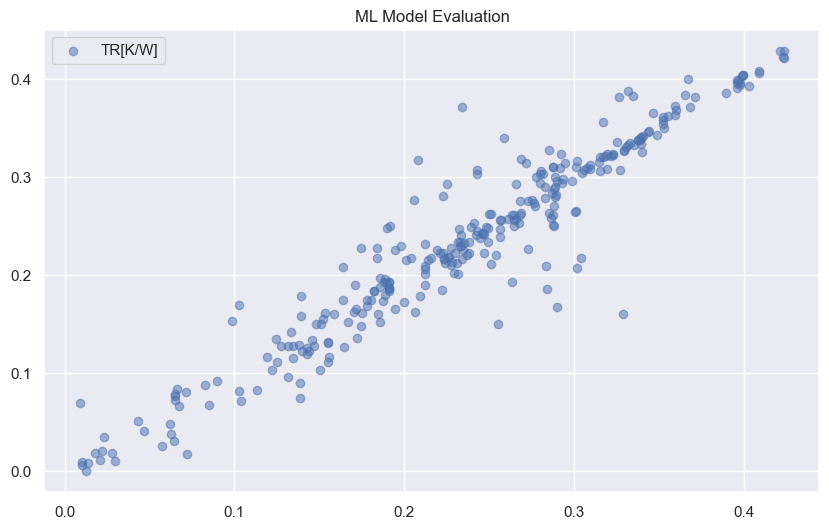

In [50]:
# plot prediction and targets
plt.figure(figsize=(10,6))
plt.scatter(prediction['TR[K/W]'], y_test['TR[K/W]'],c='b', alpha=0.5, label='TR[K/W]')
plt.title('ML Model Evaluation')
plt.legend()

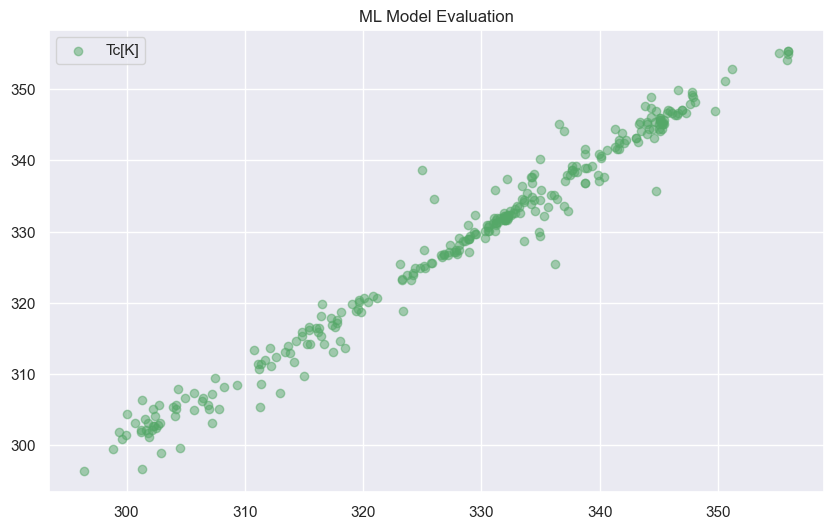

In [49]:
# plot prediction and targets
plt.figure(figsize=(10,6))
plt.scatter(prediction['Tc[K]'], y_test['Tc[K]'], c='g',alpha=0.5, label='Tc[K]')
plt.title('ML Model Evaluation')
plt.legend()

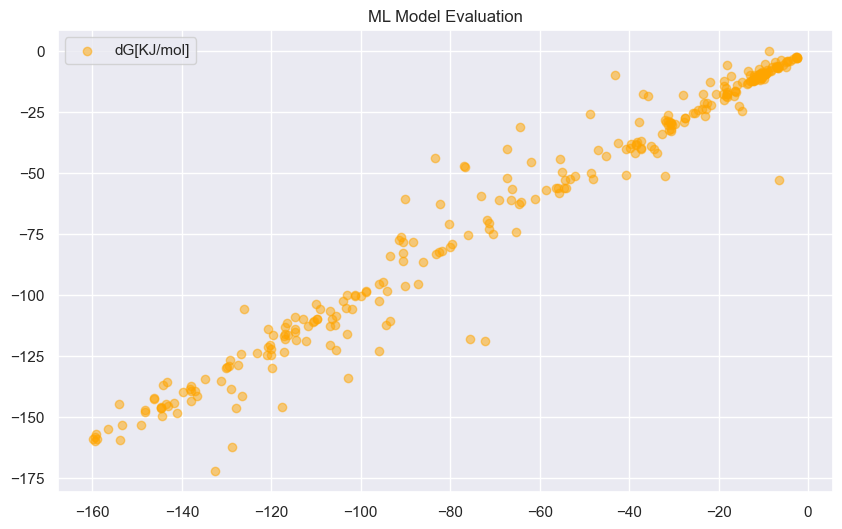

In [52]:
# plot prediction and targets
plt.figure(figsize=(10,6))
plt.scatter(prediction['dG[KJ/mol]'], y_test['dG[KJ/mol]'],c='orange', alpha=0.5, label='dG[KJ/mol]')
plt.title('ML Model Evaluation')
plt.legend()

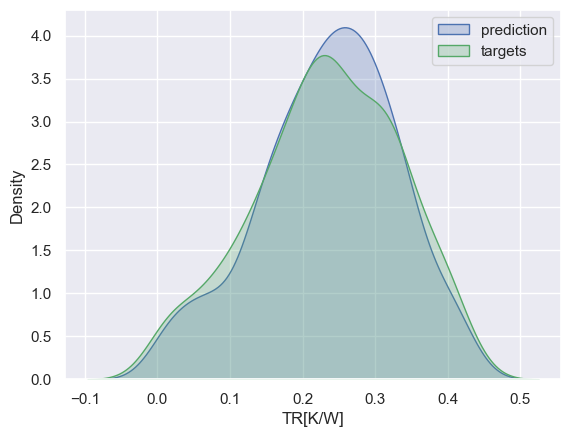

In [67]:
sns.kdeplot(prediction['TR[K/W]'], fill=True, color='b', label='prediction')
sns.kdeplot(y_test['TR[K/W]'], fill=True, color='g', label='targets')
plt.legend()

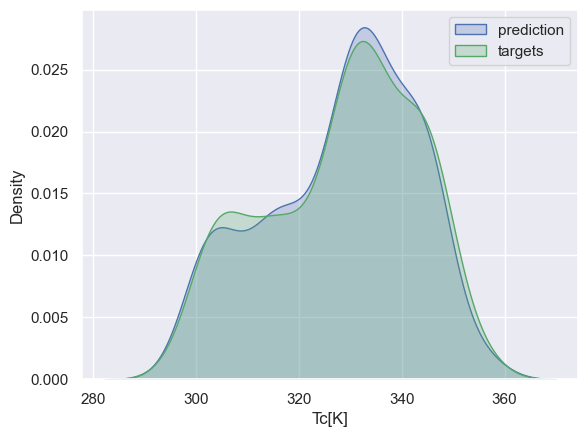

In [68]:
sns.kdeplot(prediction['Tc[K]'], fill=True, color='b', label='prediction')
sns.kdeplot(y_test['Tc[K]'], fill=True, color='g', label='targets')
plt.legend()

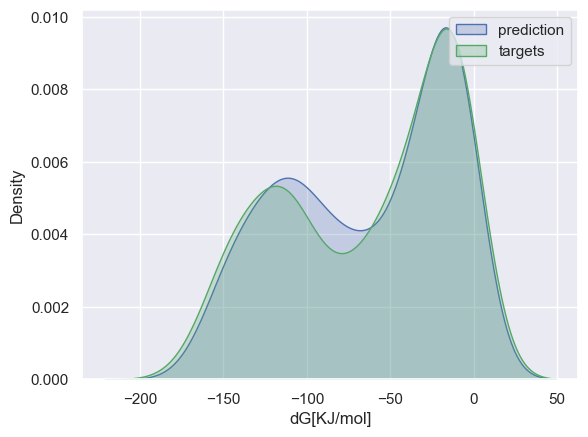

In [69]:
sns.kdeplot(prediction['dG[KJ/mol]'], fill=True, color='b', label='prediction')
sns.kdeplot(y_test['dG[KJ/mol]'], fill=True, color='g', label='targets')
plt.legend()